# 1. The Business Problem Exploring

# 2. The Dataset

### 2.1. Loading Packages and Data

In [1]:
# Importing some libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Modelling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import xgboost as xgb

#evalutation
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [2]:
# reading the train dataset
train = pd.read_csv("train.csv")

# Showing the first rows
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [3]:
# reading the test dataset
test = pd.read_csv("test.csv")

# Showing the first rows
test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


# 3.  EDA

### 3.1 Info and describe

In [4]:
# Showing some info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# Showing some info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [6]:
# Showing some info
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
# Showing some info
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [8]:
# Checking the unique values
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### 3.2 Checking for missing values

In [9]:
#   Checking for missing values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#   Checking for missing values
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### 3.3 Shape, size and number of zeros

In [11]:
# Checking the shape
train.shape

(8523, 12)

In [12]:
# Checking the shape
test.shape

(5681, 11)

In [13]:
# Checking the size
train.size

102276

In [14]:
# Checking the size
test.size

62491

In [15]:
# Checking the number of zeros
number_of_zeros = (train.to_numpy() == 0).sum()
print (number_of_zeros)

526


In [16]:
# Checking the number of zeros
number_of_zeros = (test.to_numpy() == 0).sum()
print (number_of_zeros)

353


### 3.4 Duplicated rows

In [17]:
# looking for duplicated rows
dup_train = train[train.duplicated()]

# Showing the number of duplicated rows
print("Number of duplicated rows: ", dup_train.shape)

Number of duplicated rows:  (0, 12)


In [18]:
# looking for duplicated rows
dup_test = test[test.duplicated()]

# Showing the number of duplicated rows
print("Number of duplicated rows: ", dup_test.shape)

Number of duplicated rows:  (0, 11)


### 3.5 Outliers

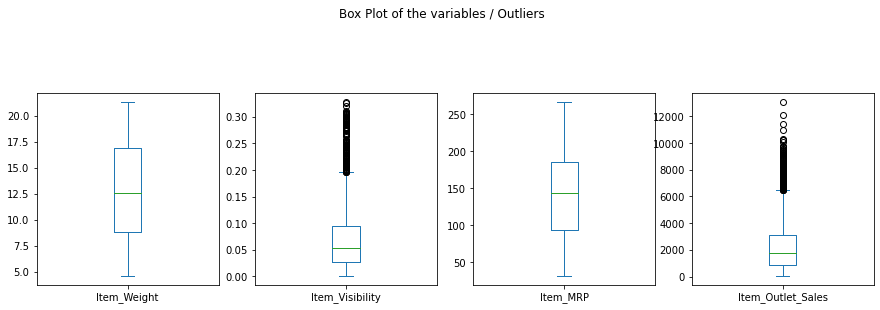

In [19]:
# Showing outliers using boxplot
train.drop(columns=['Item_Identifier',
                     'Item_Fat_Content',
                     'Item_Type',
                     'Outlet_Identifier',
                     'Outlet_Establishment_Year',
                     'Outlet_Size',
                     'Outlet_Location_Type',
                     'Outlet_Type']
          ).plot(kind='box',
                 subplots=True,
                 layout=(3,4),
                 figsize=(15,12), 
                 title='Box Plot of the variables / Outliers')
plt.show()

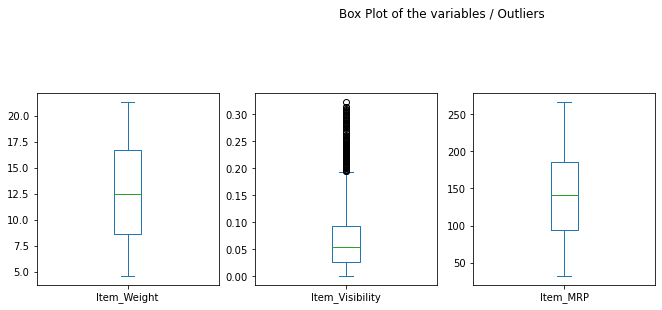

In [20]:
# Showing outliers using boxplot
test.drop(columns=['Item_Identifier',
                     'Item_Fat_Content',
                     'Item_Type',
                     'Outlet_Identifier',
                     'Outlet_Establishment_Year',
                     'Outlet_Size',
                     'Outlet_Location_Type',
                     'Outlet_Type']
          ).plot(kind='box',
                 subplots=True,
                 layout=(3,4),
                 figsize=(15,12), 
                 title='Box Plot of the variables / Outliers')
plt.show()

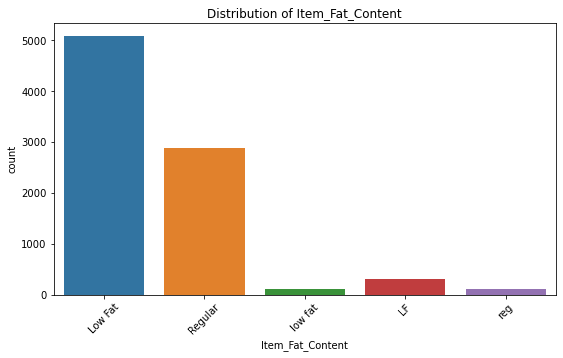

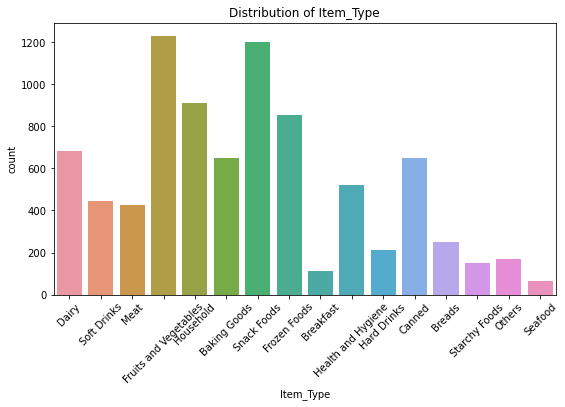

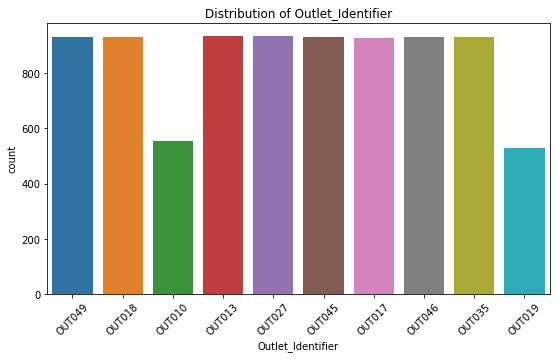

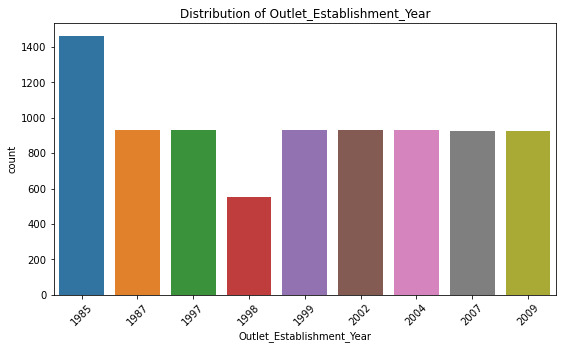

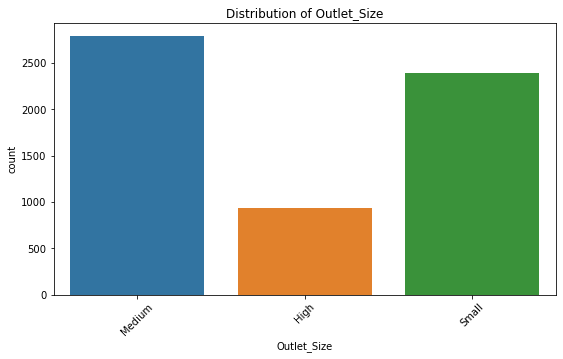

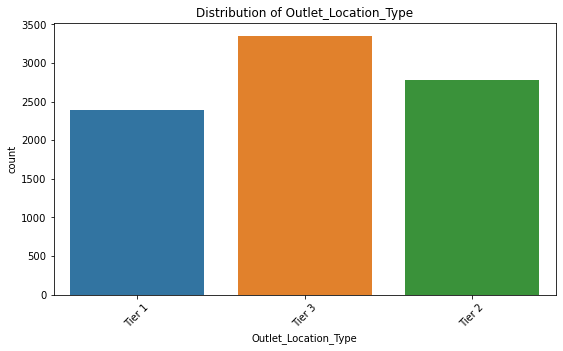

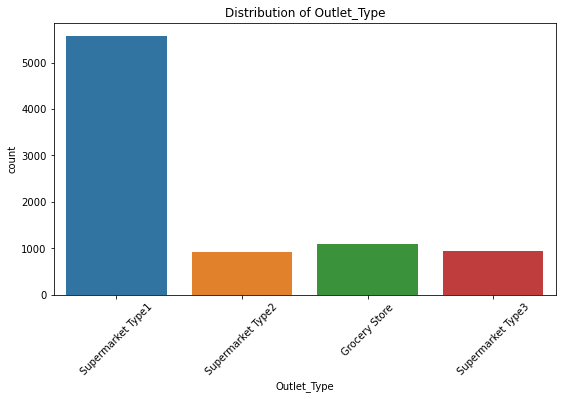

In [21]:
# create a list of categorical columns to be plotted
cat_cols = ['Item_Fat_Content',
            'Item_Type',
            'Outlet_Identifier',
            'Outlet_Establishment_Year',
            'Outlet_Size',
            'Outlet_Location_Type',
            'Outlet_Type']

# loop through the list of categorical columns and create a count plot for each column
for col in cat_cols:
    plt.figure(figsize=(9,5)) # adjust the figure size
    sns.countplot(x=col, data=train)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)  # rotate the x-axis labels by 90 degrees
    plt.show()


# 4. Preprocess the datasets

### 4.1 train dataset

#### drop unnecessary columns

In [22]:
train = train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1) # drop unnecessary columns

#### Missing Value Treatment

In [23]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].median()) # fill missing values in Item_Weight column with mean value
train['Outlet_Size'] = train['Outlet_Size'].fillna('Unknown') # fill missing values in Outlet_Size column

### 4.2. test dataset

#### drop unnecessary columns

In [24]:
test = test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1) # drop unnecessary columns

#### Missing Value Treatment

In [25]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean()) # fill missing values in Item_Weight column with mean value
test['Outlet_Size'] = test['Outlet_Size'].fillna('Unknown') # fill missing values in Outlet_Size column

# 5. Feature Engineering

### 5.1 Fixing 'Item_Fat_Content'

#### train dataset

In [26]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
train.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [28]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### test dataset

In [29]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [30]:
test.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [31]:
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

### 5.1 One Hot Encoding

In [32]:
# define list of categorical columns
cat_cols = ['Item_Fat_Content',
            'Item_Type',
            'Outlet_Establishment_Year',
            'Outlet_Size',
            'Outlet_Location_Type',
            'Outlet_Type']

# apply one hot encoding to categorical columns - Train dataset
train_encoded = pd.get_dummies(train, columns=cat_cols)

# apply one hot encoding to categorical columns - Test dataset
test_encoded = pd.get_dummies(test, columns=cat_cols)

### 5.2 Move the target column 'Item_Outlet_Sales' to the end

In [33]:
# Move column 'Item_Outlet_Sales' to the end
col = train_encoded.pop('Item_Outlet_Sales')
train_encoded.insert(len(train_encoded.columns), 'Item_Outlet_Sales', col)

In [34]:
train_encoded.head(1)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,9.3,0.016047,249.8092,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,3735.138


### 5.3 Spliting the dataset 


#### IMPORTANT:

* From now on, <b>I am just using the dataset called 'train'.</b> 
* In this way, I can test some models performance before using the models to make predictions on the dataset called 'test'.

<br><br>

In [35]:
# X_train = train_encoded.drop('Item_Outlet_Sales', axis=1) # split into features and target
# y_train = train_encoded['Item_Outlet_Sales']

# X_test = test_encoded



# Spliting the train dataset - 0.20
X = train_encoded.drop(columns=['Item_Outlet_Sales'] , axis=1)
y = train_encoded['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 4931 to 1523
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      1705 non-null   float64
 1   Item_Visibility                  1705 non-null   float64
 2   Item_MRP                         1705 non-null   float64
 3   Item_Fat_Content_Low Fat         1705 non-null   uint8  
 4   Item_Fat_Content_Regular         1705 non-null   uint8  
 5   Item_Type_Baking Goods           1705 non-null   uint8  
 6   Item_Type_Breads                 1705 non-null   uint8  
 7   Item_Type_Breakfast              1705 non-null   uint8  
 8   Item_Type_Canned                 1705 non-null   uint8  
 9   Item_Type_Dairy                  1705 non-null   uint8  
 10  Item_Type_Frozen Foods           1705 non-null   uint8  
 11  Item_Type_Fruits and Vegetables  1705 non-null   uint8  
 12  Item_Type_Hard Dr

### 5.4 Scaling

In [37]:
# standardize the features using the scaler fit on the train data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Modeling

### 6.1 Linear Regression

In [38]:
#Applying the model: 
regressor_LR = LinearRegression()
regressor_LR.fit(X_train, y_train)
LR_pred = regressor_LR.predict(X_test)

# Evaluation of the model: 
LR_score = regressor_LR.score(X_train, y_train)
LR_r2 = r2_score(y_test,LR_pred)


print('Training Set Score:',(LR_score)*100)
print('Test Set Score:',(LR_r2)*100)

Training Set Score: 56.326334768145955
Test Set Score: 56.20695049199964


### 6.2 Regularized Linear Regression

### 6.2.1 Lasso

In [39]:
#Applying the model: 
regressor_lasso = Lasso(alpha=1.0)
regressor_lasso.fit(X_train, y_train)
Lasso_pred = regressor_lasso.predict(X_test)

# Evaluation of the model: 
lasso_score = regressor_lasso.score(X_train, y_train)
lasso_r2 = r2_score(y_test,Lasso_pred)

print('Training Set Score:',(lasso_score)*100)
print('Test Set Score:',(lasso_r2)*100)

Training Set Score: 56.378303232835236
Test Set Score: 56.25971635718814


### 6.2.2 Ridge

In [40]:
#Applying the model: 
regressor_ridge = Ridge(alpha=0.5)
regressor_ridge.fit(X_train, y_train)
Ridge_pred = regressor_ridge.predict(X_test)

#Evaluation the model
ridge_score = regressor_ridge.score(X_train, y_train)
ridge_r2 = r2_score(y_test,Ridge_pred)

print('Training Set Score:',(ridge_score)*100)
print('Test Set Score:',(ridge_r2)*100)

Training Set Score: 56.37921410819742
Test Set Score: 56.23450202845868


### 6.3 RandomForest

In [41]:
#Applying the model: 
regressor_RFR = RandomForestRegressor(max_features= 3, random_state=0) 

regressor_RFR.fit(X_train, y_train)
RF_pred = regressor_RFR.predict(X_test)

# Evaluation of the model: 
RFR_score = regressor_RFR.score(X_train, y_train)
RFR_r2 = r2_score(y_test,RF_pred)

print('Training Set Score:',(RFR_score)*100)
print('Test Set Score:',(RFR_r2)*100)

Training Set Score: 93.35853253269451
Test Set Score: 54.53135639372386


### 6.4 XGBoost

In [42]:
# Instantiate an XGBRegressor model
regressor_XGB = xgb.XGBRegressor()

# Fit the model to the training set
regressor_XGB.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
XGB_pred = regressor_XGB.predict(X_test)

# Calculate the R-squared score of the model on the test set
XGB_r2 = r2_score(y_test,XGB_pred)

# Calculate the R-squared score of the model on the training set
XGB_score = regressor_XGB.score(X_train, y_train)

# Print the scores
print('Training Set Score:',(XGB_score)*100)
print('Test Set Score:',(XGB_r2)*100)

Training Set Score: 85.61500513666611
Test Set Score: 50.995770315768276


# 7. Summary

#### Score

In [43]:
# comparing the models performance - score()
print("Linear Regression:         ", LR_score*100)
print("Random Forest Regression:  ", RFR_score*100)
print("Lasso Regression:          ", lasso_score*100)
print("Ridge Regression:          ", ridge_score*100)
print("XGBoost:                   ", XGB_score*100)

Linear Regression:          56.326334768145955
Random Forest Regression:   93.35853253269451
Lasso Regression:           56.378303232835236
Ridge Regression:           56.37921410819742
XGBoost:                    85.61500513666611


#### R2 Score

In [44]:
# comparing the models performance - r2_score()
print("(R2 Score) Linear Regression:         ", LR_r2*100)
print("(R2 Score) Random Forest Regression:  ", RFR_r2*100)
print("(R2 Score) Lasso Regression:          ", lasso_r2*100)
print("(R2 Score) Ridge Regression:          ", ridge_r2*100)
print("(R2 Score) XGBoost:                   ", XGB_r2*100)

(R2 Score) Linear Regression:          56.20695049199964
(R2 Score) Random Forest Regression:   54.53135639372386
(R2 Score) Lasso Regression:           56.25971635718814
(R2 Score) Ridge Regression:           56.23450202845868
(R2 Score) XGBoost:                    50.995770315768276
